# 1. Introduction
Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not.

In this project, we will analyze a fascinating dataset on every single lego block that has ever been built!
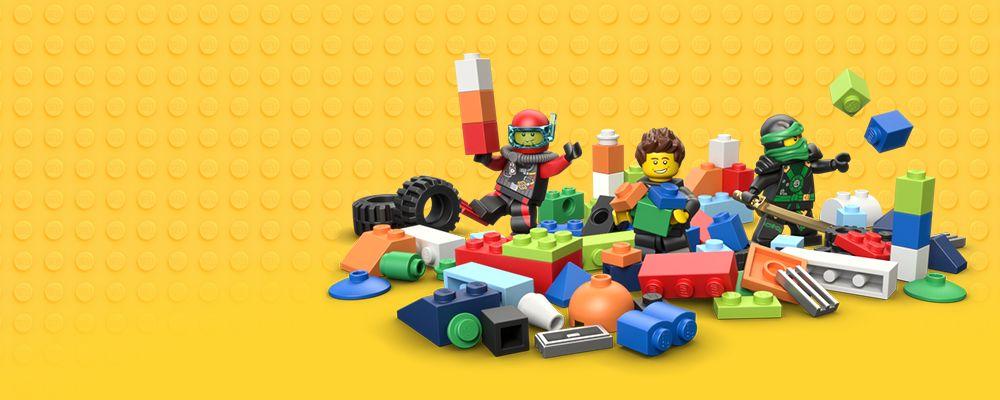

# 2. Reading data
The databases of lego blocks used in this project is provided by [Rebrickable](https://rebrickable.com/downloads/) as csv files.
Let us start by reading in the colors data to get a sense of the diversity of lego sets!

In [1]:
# Import modules
import pandas as pd

# Read colors data
colors = pd.read_csv('datasets/colors.csv')

# Print data overview
colors.info()

# Print the first few rows
colors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        186 non-null    int64 
 1   name      186 non-null    object
 2   rgb       186 non-null    object
 3   is_trans  186 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.9+ KB


,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


# 3. Exploring Colors
Now that we have read the colors data, we can start exploring it! Let us start by understanding the number of colors available.

In [2]:
# How many distinct colors are available?
num_colors = colors.count().unique()
print(num_colors)

[186]


# 4. Transparent Colors in Lego Sets
From 186 distinct colors available, it would be interesting to explore the distribution of transparent vs. non-transparent colors. Fortunately, colors dataset has a column named is_trans that indicates whether a color is transparent or not. .

In [3]:
# colors_summary: Distribution of colors based on transparency
colors_summary = colors.groupby('is_trans')['is_trans'].count()
print(colors_summary)

is_trans
f    151
t     35
Name: is_trans, dtype: int64


# 5. Explore Lego Sets
Another interesting dataset available in this database is the sets data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained.
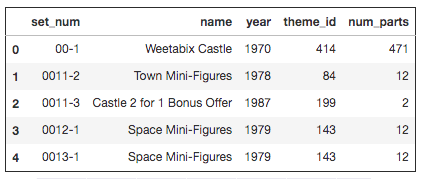
Let us use this data to explore how the average number of parts in Lego sets has varied over the years.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16940 entries, 0 to 16939
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    16940 non-null  object
 1   name       16940 non-null  object
 2   year       16940 non-null  int64 
 3   theme_id   16940 non-null  int64 
 4   num_parts  16940 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 661.8+ KB


<AxesSubplot:xlabel='year'>

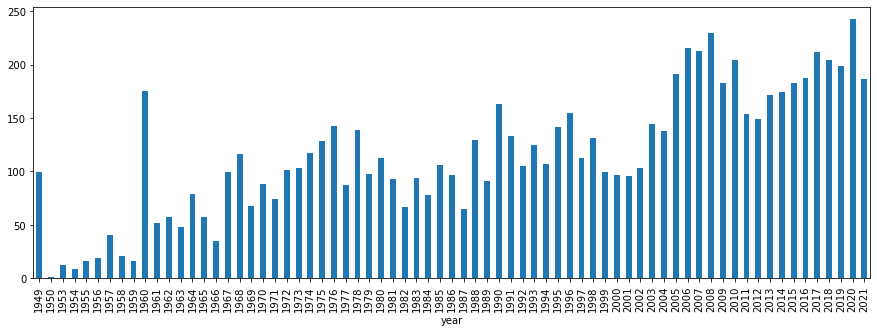

In [4]:
%matplotlib inline

# Read sets data
sets = pd.read_csv('datasets/sets.csv')

# Print sets overview
sets.info()

# Create a summary of average number of parts by year using sets data: `parts_by_year`
parts_by_year = sets.groupby('year')['num_parts'].mean()

# Plot trends in average number of parts by year
parts_by_year.plot(kind='bar', figsize=(15,5))

# 6. Lego Themes Over Years
While the average number of parts per set is fluctuative over the years, it might be different with number of themes shipped.
Let us try to get a sense of how the number of themes shipped has varied over the years.

name
Basic Building Set        56
Universal Building Set    34
Helicopter                30
Basic Set                 30
Fire Station              20
Police Station            17
Tow Truck                 17
Tractor                   17
Fire Truck                17
Medium Bucket             15
Name: name, dtype: int64


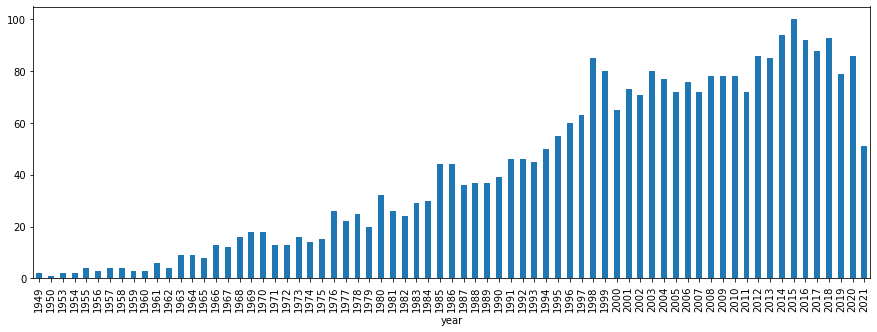

In [5]:
# themes_by_year: Number of themes shipped by year
themes_by_year=sets.groupby('year')['theme_id'].nunique()
themes_by_year=themes_by_year.reset_index()
themes_by_year.plot(x='year',y='theme_id',kind='bar', figsize=(15,5), legend=None)

# the most long-standing themes of all times
long_standing_themes=sets.groupby('name')['name'].count()
print(long_standing_themes.sort_values(ascending=False).head(10))

# 7. Related Lego Themes
The overall trends of themes shipped over the years is increasing with a dip on ongoing year, since the data used is only dated to March 14th. Meanwhile, Basic Building Set's huge popularity is cemented by 56 years of shipping history.

As Lego gets busy being creative, it only made sense that some of the themes created is somehow similar or even related to one another. Let us explore it further to to prove this assumption.

In [10]:
# Read themes data
themes = pd.read_csv('datasets/themes.csv')

# Print sets overview
print(themes.info())

# Print the first few rows
print(themes.head())

# Count how often a theme become parent of other themes
themes['as_parent'] = themes.groupby('parent_id')['parent_id'].count().astype(int)
print(themes.sort_values('as_parent',ascending=False).head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         598 non-null    int64  
 1   name       598 non-null    object 
 2   parent_id  465 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.1+ KB
None
   id            name  parent_id
0   1         Technic        NaN
1   2  Arctic Technic        1.0
2   3     Competition        1.0
3   4  Expert Builder        1.0
4   5           Model        1.0
      id                            name  parent_id  as_parent
324  402                        Vehicles      400.0       38.0
535  650                       Legoville      632.0       35.0
504  609  The LEGO Batman Movie Series 1      535.0       31.0
126  134                      Insectoids      126.0       20.0
507  614                          Jungle       52.0       18.0
67    71                     Coast Guard       67.0 

# 8. Wrapping It All Up!
It is proven now that many of the Lego themes are similar to one another. One of them even inspired 38 other sets since its creation.

With the ability to recreate an entire world with those extensive ranges of bricks, no wonder Lego has been able to offer an unlimited amount of fun across ages.